In [1]:
#!pip install pysentimiento==0.7.2

In [1]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


2023-12-08 08:47:03.890463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
analyzer.predict("Qué olor a mandarina")

AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.174, POS: 0.087})

In [3]:
#Hate Speech (misogyny & racism)

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [4]:
hate_speech_analyzer.predict('sta bestia introduciendo permitan padr familia aberrant necesitan sexo dejen vivir malicia cabe duda ltimo tiempo cristo vien pronto arrepientans conviertans dio borrado pecado venga presencia tiempo refrigerio')

AnalyzerOutput(output=[], probas={hateful: 0.200, targeted: 0.016, aggressive: 0.114})

In [5]:
analyzer.predict('sta bestia introduciendo permitan padr familia aberrant necesitan sexo dejen vivir malicia cabe duda ltimo tiempo cristo vien pronto arrepientans conviertans dio borrado pecado venga presencia tiempo refrigerio')

AnalyzerOutput(output=NEG, probas={NEG: 0.698, NEU: 0.279, POS: 0.023})

In [6]:
import pandas as pd
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_genero_procesado.csv')

In [8]:
df['comment_stem'][0]

'seria mejor digan espa ole sigan arruinando idioma castellano hahhahaahahajajajajajajajajajajjajja'

In [9]:
def asignar_valor(elemento):
    if isinstance(elemento, str):
        resultado = analyzer.predict(elemento)
        if resultado.output == 'NEG':
            return -1
        elif resultado.output == 'NEU':
            return 0
        elif resultado.output == 'POS':
            return 1
        else:
            print(f"Output de sentimiento desconocido: {resultado.output}")
            return None  # Manejar otros casos si es necesario

# Aplicar la función a la columna 'comment_stem' y crear una nueva columna 'valor_asignado'
df['sentiment'] = df['comment_stem'].apply(lambda x: asignar_valor(x))

# Mostrar el DataFrame con la nueva columna


In [10]:
df.head()

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,Seria mejor que digan l@s niñ@s para que los e...,seria mejor digan espa ole sigan arruinando id...,[0. 0. 0. ... 0. 0. 0.],-1.0
1,1,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,"Les niñes dijo esa señora,los españoles estan ...",dijo espa ole estan arruinando idioma castella...,[0. 0. 0. ... 0. 0. 0.],-1.0
2,2,fN48ESWAa_g,UCjaaONgMV2TD-mmSxlo6gGQ,Protejamos a Lis niños de la mayor mentira de ...,protejamo mayor mentira humanidad religi,[0. 0. 0. ... 0. 0. 0.],-1.0
3,3,fN48ESWAa_g,UC4Qts7s5CUO7cu2xeQzqCHw,"No soy española, los reyes de españa tienen op...",espa rey espa opini sistema salud estan hecho ...,[0. 0. 0. ... 0. 0. 0.],0.0
4,4,fN48ESWAa_g,UCGSnhdpDi3BKmF5rfle6vxQ,Estos son los comunistas. Los q cargan contra ...,comunista cargan cura dalai lama,[0. 0. 0. ... 0. 0. 0.],-1.0


In [11]:
df['sentiment'].value_counts()

 0.0    5028
-1.0    2513
 1.0    1828
Name: sentiment, dtype: int64

In [12]:
df[df['sentiment']==-1]

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,Seria mejor que digan l@s niñ@s para que los e...,seria mejor digan espa ole sigan arruinando id...,[0. 0. 0. ... 0. 0. 0.],-1.0
1,1,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,"Les niñes dijo esa señora,los españoles estan ...",dijo espa ole estan arruinando idioma castella...,[0. 0. 0. ... 0. 0. 0.],-1.0
2,2,fN48ESWAa_g,UCjaaONgMV2TD-mmSxlo6gGQ,Protejamos a Lis niños de la mayor mentira de ...,protejamo mayor mentira humanidad religi,[0. 0. 0. ... 0. 0. 0.],-1.0
4,4,fN48ESWAa_g,UCGSnhdpDi3BKmF5rfle6vxQ,Estos son los comunistas. Los q cargan contra ...,comunista cargan cura dalai lama,[0. 0. 0. ... 0. 0. 0.],-1.0
6,6,fN48ESWAa_g,UC9yYR8_Di37L_H-gI6Y6-_Q,Me da as o esta mujer que hirror,mujer hirror,[0. 0. 0. ... 0. 0. 0.],-1.0
...,...,...,...,...,...,...,...
9896,9896,Lzc8k6Bq9yY,UCPYKNcUetjt6WrctBkL4v7g,"Esas risas eran de terror, realmente por dentr...",risa terror realment dentro destrozada semejan...,[0. 0. 0. ... 0. 0. 0.],-1.0
9897,9897,Lzc8k6Bq9yY,UC2n0GoDbungjbslB61fWvwA,Las “feminazis” le han destrozado la carrera y...,feminazi destrozado carrera credibilidad pobr ...,[0. 0. 0. ... 0. 0. 0.],-1.0
9905,9905,Lzc8k6Bq9yY,UCbTc2AMZfRasxehf3rAtuvQ,El gobierno ha sido hábil desviando la atenció...,gobierno sido desviando atenc ilegal maniobra ...,[0. 0. 0. ... 0. 0. 0.],-1.0
9906,9906,Lzc8k6Bq9yY,UC_wOvBphynhcpRylyhVFZfw,Han borrado la cuenta de Twitter de alvise..ba...,borrado cuenta twitter alvis basta censura,[0. 0. 0. ... 0. 0. 0.],-1.0


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
def show_wordcloud(df, column_name):
    all_words = df[column_name].tolist()
    all_words_str = ' '.join([str(x) for x in all_words if str(x).lower()]) 

    # Define la fuente TrueType que quieres usar (asegúrate de que sea compatible)
    font_path = 'arial.ttf'
    
    # Resto de tu código para procesar el texto y generar la WordCloud...
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color='black',
        colormap='viridis',
        #font_path=font_path
    ).generate(all_words_str)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

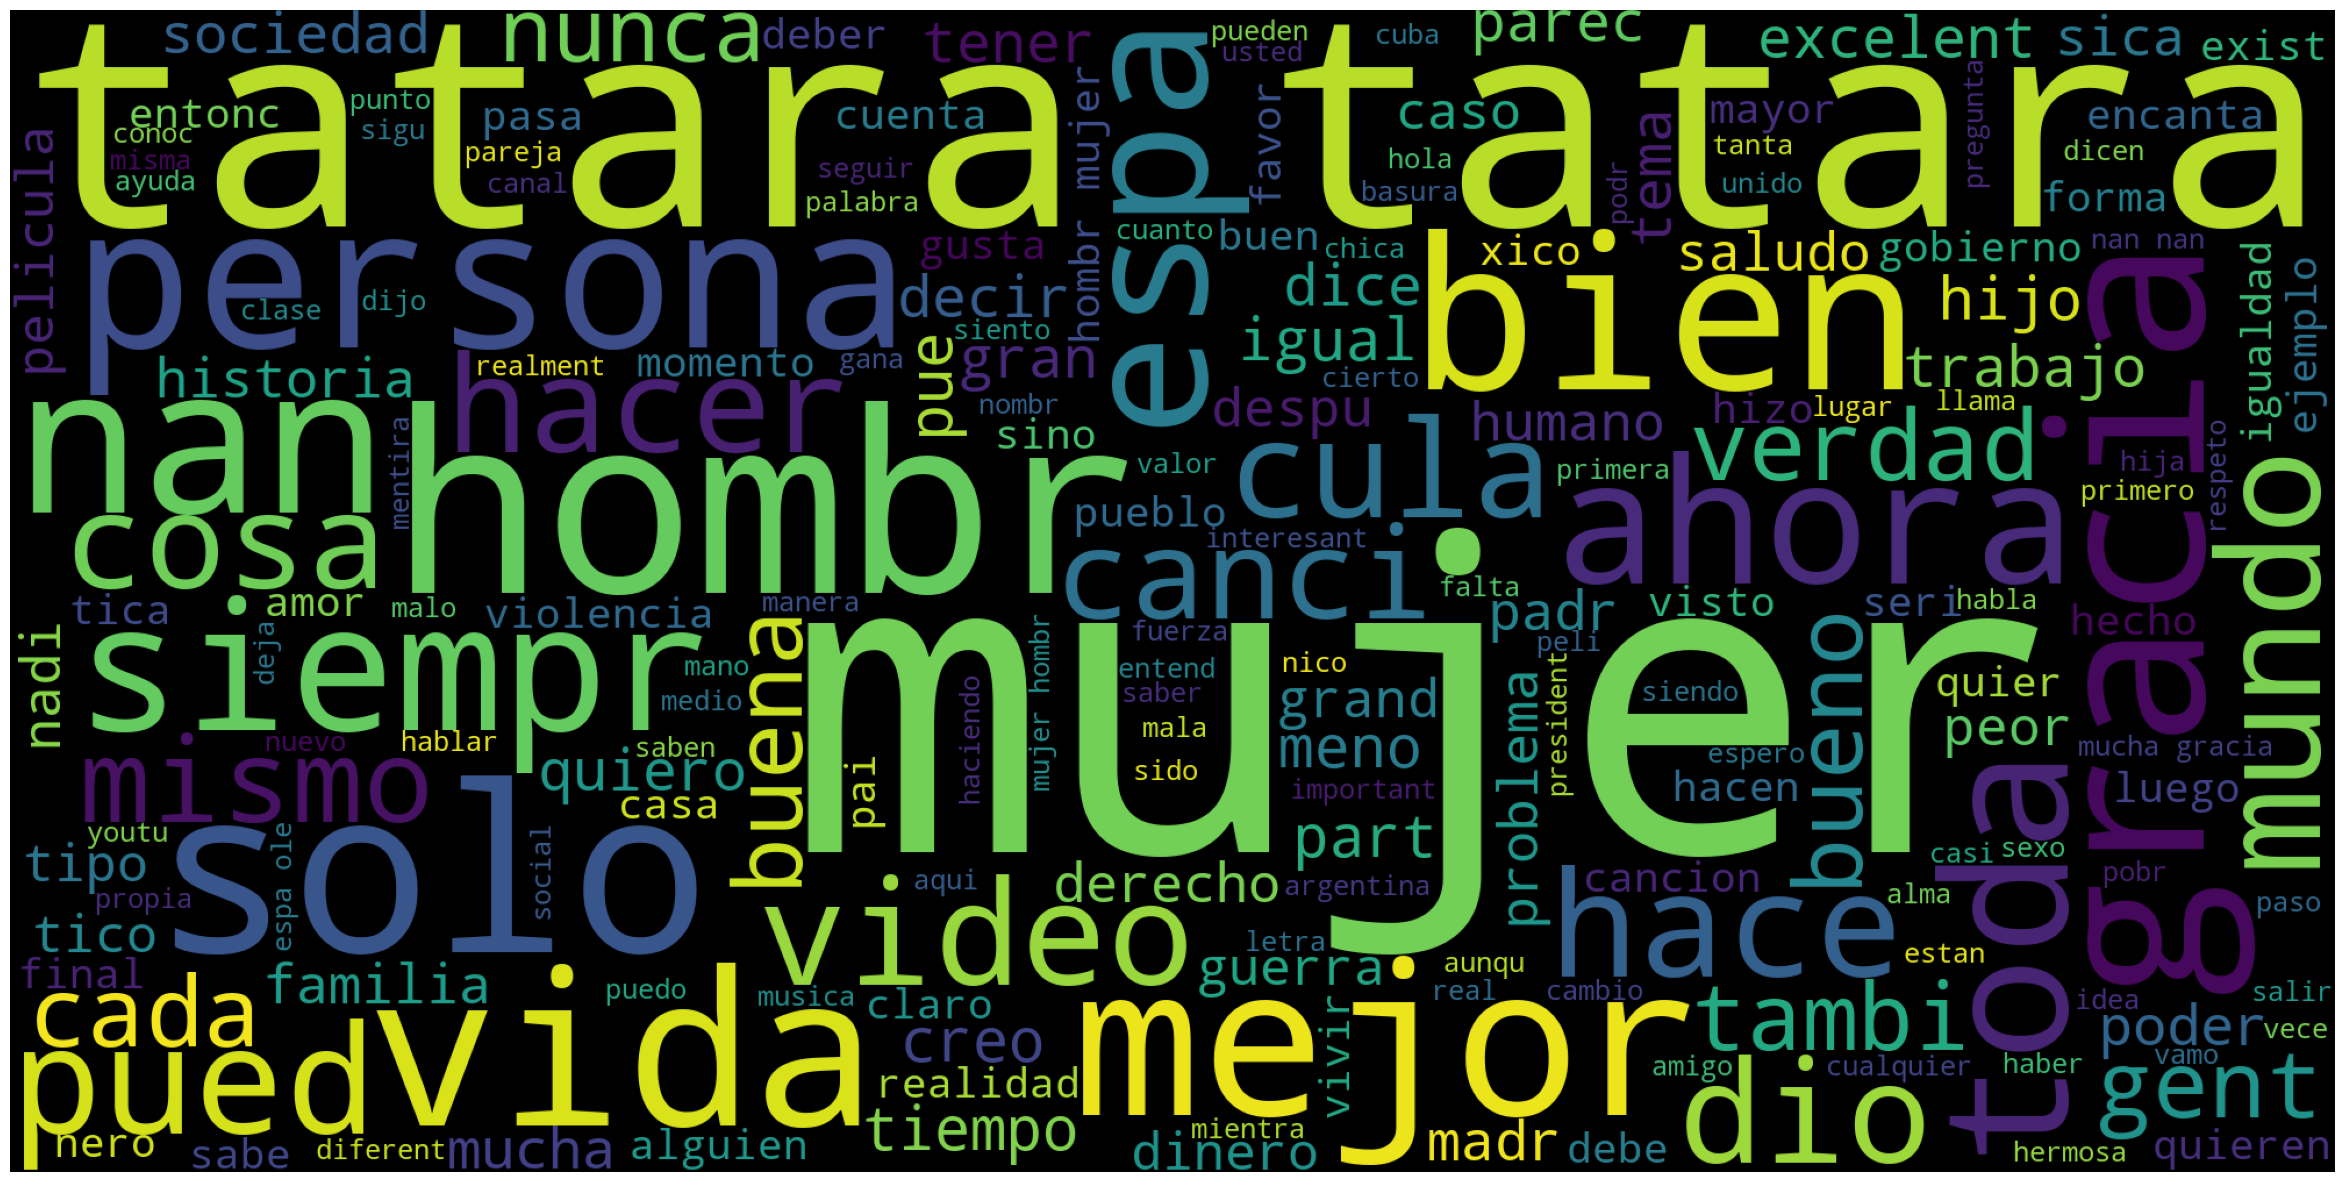

In [38]:
show_wordcloud(df,'comment_stem')

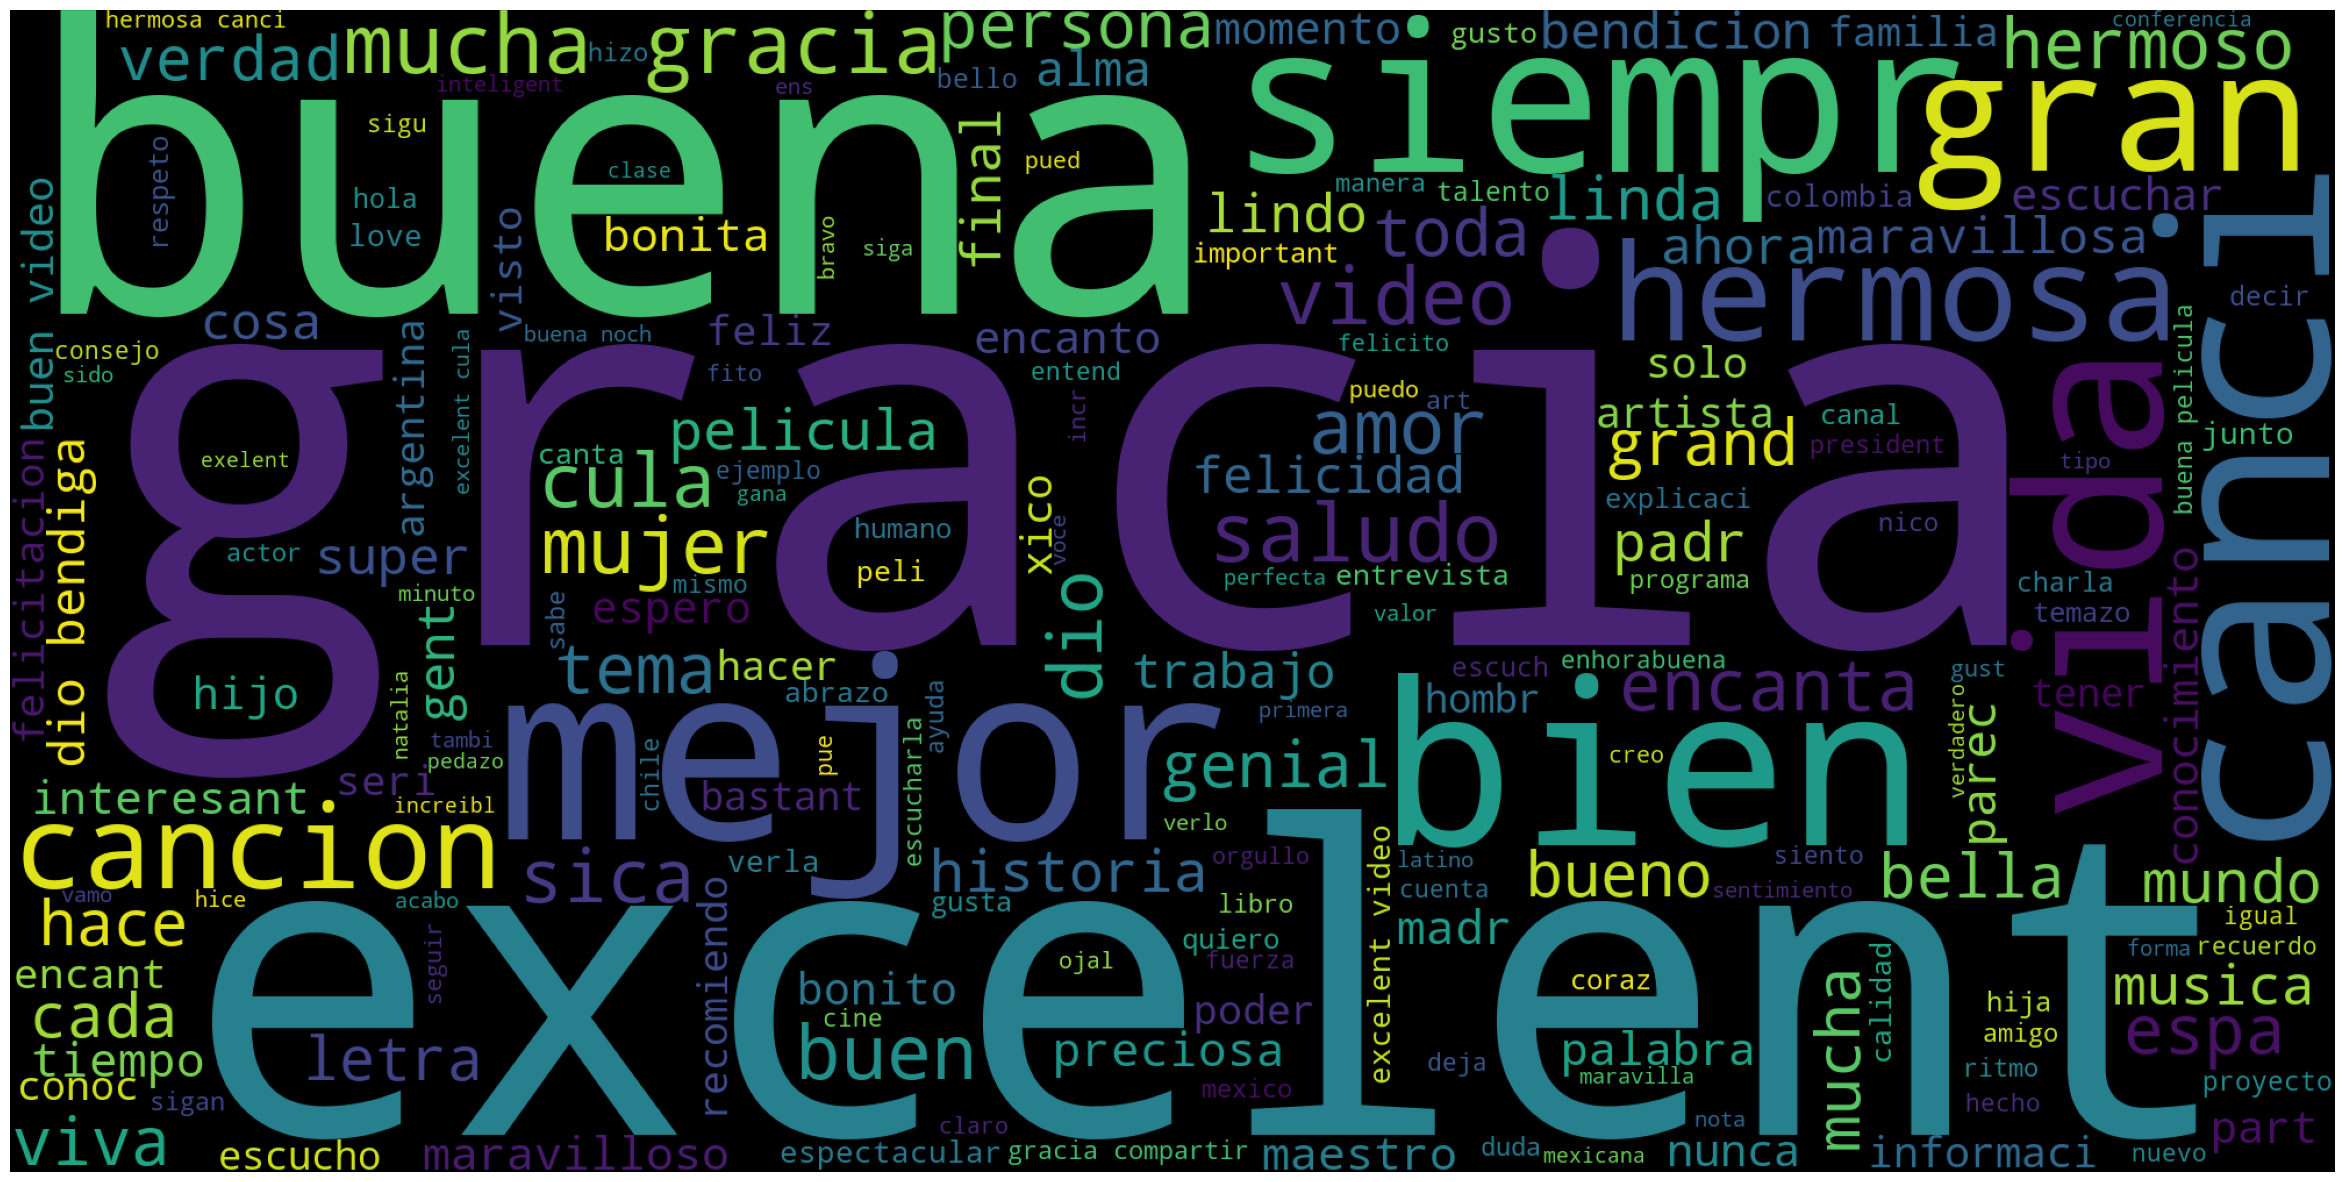

In [39]:
show_wordcloud(df[df['sentiment'] == 1], 'comment_stem')

In [41]:
df.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_genero_sentimiento.csv')

In [42]:
# Filtrar las filas donde 'sentiment' es igual a -1
df_neg = df[df['sentiment'] == -1]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neg = df_neg[columnas_deseadas].copy()

df_neg.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,Seria mejor que digan l@s niñ@s para que los e...,[0. 0. 0. ... 0. 0. 0.],seria mejor digan espa ole sigan arruinando id...,-1.0
1,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,"Les niñes dijo esa señora,los españoles estan ...",[0. 0. 0. ... 0. 0. 0.],dijo espa ole estan arruinando idioma castella...,-1.0
2,fN48ESWAa_g,UCjaaONgMV2TD-mmSxlo6gGQ,Protejamos a Lis niños de la mayor mentira de ...,[0. 0. 0. ... 0. 0. 0.],protejamo mayor mentira humanidad religi,-1.0
4,fN48ESWAa_g,UCGSnhdpDi3BKmF5rfle6vxQ,Estos son los comunistas. Los q cargan contra ...,[0. 0. 0. ... 0. 0. 0.],comunista cargan cura dalai lama,-1.0
6,fN48ESWAa_g,UC9yYR8_Di37L_H-gI6Y6-_Q,Me da as o esta mujer que hirror,[0. 0. 0. ... 0. 0. 0.],mujer hirror,-1.0


In [43]:
df_neg.shape

(2513, 6)

In [45]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_genero_negativo.csv')

In [59]:
import pandas as pd

In [60]:
df_neg = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_genero_negativo.csv')

In [61]:
df_neg.shape

(2513, 7)

In [9]:
def hateful(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'hateful' está presente en las probabilidades
        if 'hateful' in resultado.probas:
            return resultado.probas['hateful']  # Devolver el valor de 'hateful'
        else:
            print(f"No se encontró 'hateful' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [63]:
df_neg['c_hateful'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [64]:
df_neg['comment_stem'][2472]

'sienten orgulloso presuemn mexicano mismo mexico misma gent echado soga cuello solo fanstico macionalista verdadero problema cooperan caso discutiendo diferencia porlitica mierda'

In [65]:
hate_speech_analyzer.predict('polic migraci dejan meter saben corren peligro')

AnalyzerOutput(output=[], probas={hateful: 0.397, targeted: 0.005, aggressive: 0.148})

In [7]:
def targeted(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'targeted' está presente en las probabilidades
        if 'targeted' in resultado.probas:
            return resultado.probas['targeted']  # Devolver el valor de 'targeted'
        else:
            print(f"No se encontró 'targeted' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [67]:
df_neg['targeted'] = df_neg['comment_stem'].apply(lambda x: targeted(x))

In [8]:
def aggresive(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'aggressive' está presente en las probabilidades
        if 'aggressive' in resultado.probas:
            return resultado.probas['aggressive']  # Devolver el valor de 'aggressive'
        else:
            print(f"No se encontró 'aggressive' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [71]:
df_neg['aggresive'] = df_neg['comment_stem'].apply(lambda x: aggresive(x))

In [73]:
df_neg.head()

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,c_hateful,targeted,aggresive
0,0,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,Seria mejor que digan l@s niñ@s para que los e...,[0. 0. 0. ... 0. 0. 0.],seria mejor digan espa ole sigan arruinando id...,-1.0,0.101548,0.006980,0.032377
1,1,fN48ESWAa_g,UC5R9Bj7w3bWd2xk8Y9DywsA,"Les niñes dijo esa señora,los españoles estan ...",[0. 0. 0. ... 0. 0. 0.],dijo espa ole estan arruinando idioma castella...,-1.0,0.045441,0.009270,0.020543
2,2,fN48ESWAa_g,UCjaaONgMV2TD-mmSxlo6gGQ,Protejamos a Lis niños de la mayor mentira de ...,[0. 0. 0. ... 0. 0. 0.],protejamo mayor mentira humanidad religi,-1.0,0.038464,0.008976,0.015821
3,4,fN48ESWAa_g,UCGSnhdpDi3BKmF5rfle6vxQ,Estos son los comunistas. Los q cargan contra ...,[0. 0. 0. ... 0. 0. 0.],comunista cargan cura dalai lama,-1.0,0.125123,0.060261,0.119007
4,6,fN48ESWAa_g,UC9yYR8_Di37L_H-gI6Y6-_Q,Me da as o esta mujer que hirror,[0. 0. 0. ... 0. 0. 0.],mujer hirror,-1.0,0.725080,0.205010,0.367652


In [74]:
df_neg.aggresive

0       0.032377
1       0.020543
2       0.015821
3       0.119007
4       0.367652
          ...   
2508    0.091797
2509    0.877882
2510    0.015486
2511    0.011856
2512    0.036275
Name: aggresive, Length: 2513, dtype: float64

In [75]:
import matplotlib.pyplot as plt

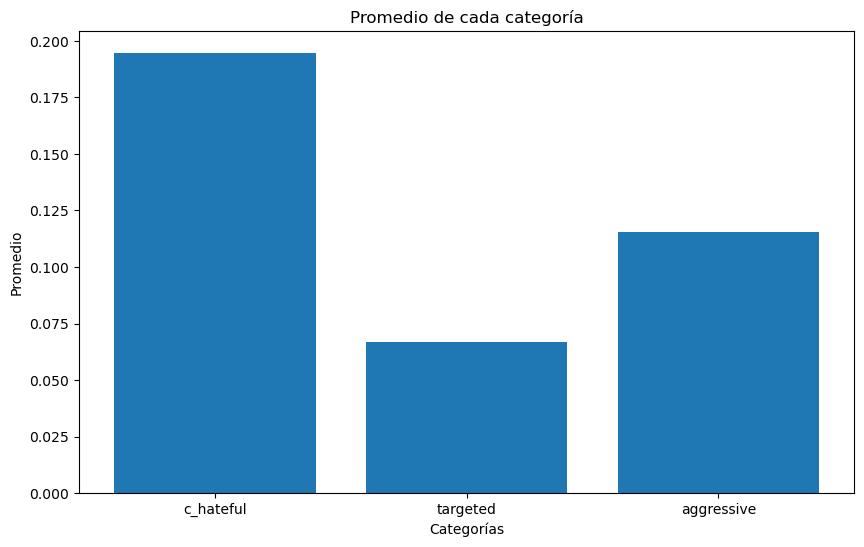

In [76]:
c_hateful = df_neg['c_hateful']
targeted = df_neg['targeted']
aggresive = df_neg['aggresive']

plt.figure(figsize=(10, 6))

plt.bar(['c_hateful', 'targeted', 'aggressive'], [c_hateful.mean(), targeted.mean(), aggresive.mean()])
plt.xlabel('Categorías')
plt.ylabel('Promedio')
plt.title('Promedio de cada categoría')

plt.show()



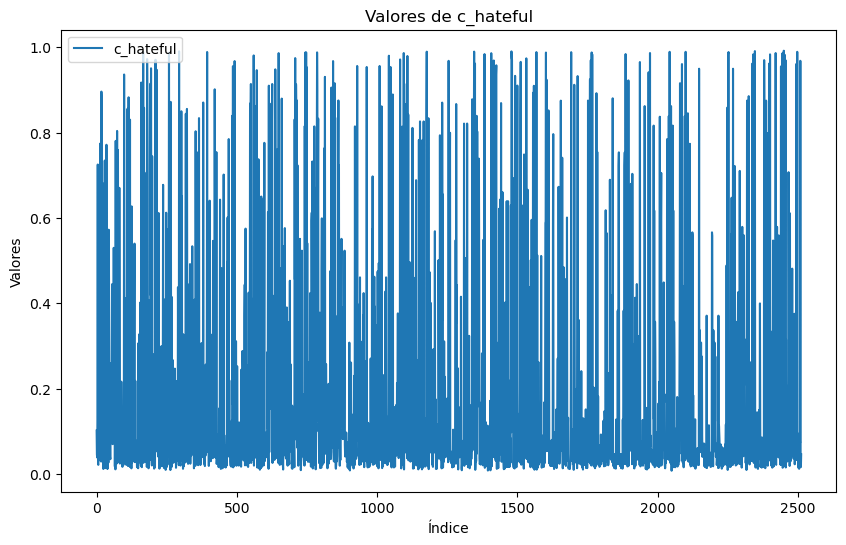

In [77]:
plt.figure(figsize=(10, 6))

plt.plot(df_neg['c_hateful'], label='c_hateful')
# plt.plot(df_neg['targeted'], label='targeted')
# plt.plot(df_neg['aggresive'], label='aggresive')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores de c_hateful')
plt.legend()

plt.show()

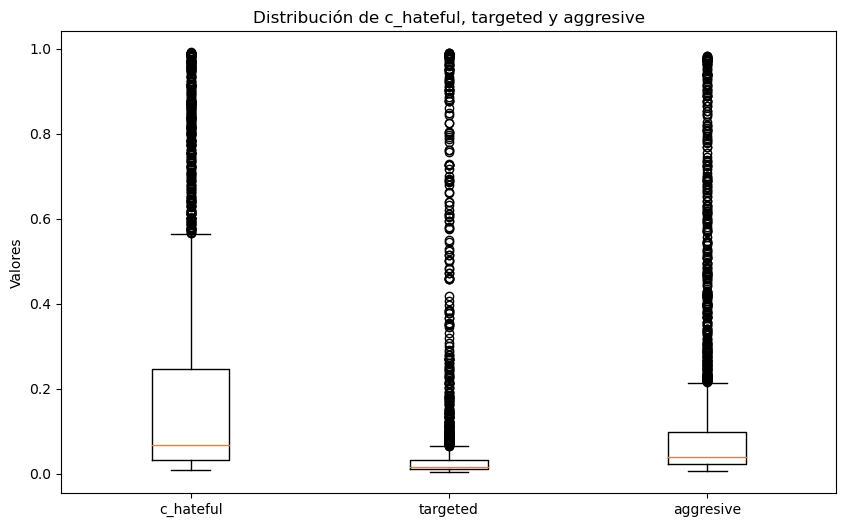

In [78]:
plt.figure(figsize=(10, 6))

plt.boxplot([c_hateful, targeted, aggresive], labels=['c_hateful', 'targeted', 'aggresive'])
plt.ylabel('Valores')
plt.title('Distribución de c_hateful, targeted y aggresive')

plt.show()

In [81]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_negativos_genero_ filtrados.csv')

Filtrar los neutros

In [23]:
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_genero_sentimiento.csv')

In [12]:
# Filtrar las filas donde 'sentiment' es igual a 0 =neutro
df_neutro = df[df['sentiment'] == 0]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neutro = df_neutro[columnas_deseadas].copy()

df_neutro.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
3,fN48ESWAa_g,UC4Qts7s5CUO7cu2xeQzqCHw,"No soy española, los reyes de españa tienen op...",[0. 0. 0. ... 0. 0. 0.],espa rey espa opini sistema salud estan hecho ...,0.0
5,fN48ESWAa_g,UCQbsjpbwCf9i0GWpXYJDjpQ,"Los niños de DIOS, NO se TOCAN!!",[0. 0. 0. ... 0. 0. 0.],dio tocan,0.0
9,fN48ESWAa_g,UCCJ7-q-pN4bHboim1ehSVQA,Españoles y despues se qson muy occidentales,[0. 0. 0. ... 0. 0. 0.],espa ole despu qson occidental,0.0
12,fN48ESWAa_g,UCXe6MTUoWZ9HxtrBCmE5SMA,Yo con Irene Siempre,[0. 0. 0. ... 0. 0. 0.],iren siempr,0.0
13,fN48ESWAa_g,UCAL_FMNxmgd-oo2w5F_XCGw,"Irene Montero es muy progre, y los pogres siem...",[0. 0. 0. ... 0. 0. 0.],iren montero progr pogr siempr vanguardia,0.0


In [13]:
df_neutro.to_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_genero_neutro.csv')

In [24]:
df_neutro = pd.read_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_genero_neutro.csv')
df_neutro

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,3,fN48ESWAa_g,UC4Qts7s5CUO7cu2xeQzqCHw,"No soy española, los reyes de españa tienen op...",[0. 0. 0. ... 0. 0. 0.],espa rey espa opini sistema salud estan hecho ...,0.0
1,5,fN48ESWAa_g,UCQbsjpbwCf9i0GWpXYJDjpQ,"Los niños de DIOS, NO se TOCAN!!",[0. 0. 0. ... 0. 0. 0.],dio tocan,0.0
2,9,fN48ESWAa_g,UCCJ7-q-pN4bHboim1ehSVQA,Españoles y despues se qson muy occidentales,[0. 0. 0. ... 0. 0. 0.],espa ole despu qson occidental,0.0
3,12,fN48ESWAa_g,UCXe6MTUoWZ9HxtrBCmE5SMA,Yo con Irene Siempre,[0. 0. 0. ... 0. 0. 0.],iren siempr,0.0
4,13,fN48ESWAa_g,UCAL_FMNxmgd-oo2w5F_XCGw,"Irene Montero es muy progre, y los pogres siem...",[0. 0. 0. ... 0. 0. 0.],iren montero progr pogr siempr vanguardia,0.0
...,...,...,...,...,...,...,...
5023,9903,Lzc8k6Bq9yY,UChXBEVHnTsL1txm8vUT2N3w,"Es de vergüenza, la que nos espera en este pais",[0. 0. 0. ... 0. 0. 0.],verg enza espera pai,0.0
5024,9904,Lzc8k6Bq9yY,UCLGkyXkLqjGoBn-NFjoqaBQ,Another MeToo SCAM!,[0. 0. 0. ... 0. 0. 0.],anoth metoo scam,0.0
5025,9907,Lzc8k6Bq9yY,UC_wOvBphynhcpRylyhVFZfw,Me he suscrito solo por qué te han censurado c...,[0. 0. 0. ... 0. 0. 0.],suscrito solo censurado cuenta gran apoyo,0.0
5026,9909,Lzc8k6Bq9yY,UCADwva5K6Ej9N1vkCGCwqdQ,Que no este llorando por los rincones no quier...,[0. 0. 0. ... 0. 0. 0.],llorando rincon quier decir consentimiento cas...,0.0


In [15]:
df_neutro['hateful'] = df_neutro['comment_stem'].apply(lambda x: hateful(x))

In [16]:
df_neutro['targeted'] = df_neutro['comment_stem'].apply(lambda x: targeted(x))

In [17]:
df_neutro['aggresive'] = df_neutro['comment_stem'].apply(lambda x: aggresive(x))

In [18]:
#defino los valores de mas de 0.5 en hateful 
hateful_mayor_05 = df_neutro[df_neutro['hateful'] > 0.5]

In [19]:
len(hateful_mayor_05)

203

In [26]:
# Concatenar los DataFrames df_neutro y hateful_mayor_05
df_hate_genero = pd.concat([df_neutro, hateful_mayor_05], ignore_index=True)



In [29]:
df_hate_genero = df_hate_genero.drop([ 'Unnamed: 0'], axis=1)

In [31]:
df_hate_genero.to_csv('/Users/usuario/Downloads/irunela/csv/csv_hate/hate_genero.csv')

In [32]:
df_hate_genero.shape

(5231, 9)